In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Current Data is about Cost of Advertisement through different modes(Tv,radio,newspaper) and how much sales we are getting cz of it

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning/csv files/Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Text(0.5, 1.0, 'Newspaper spend vs Sales')

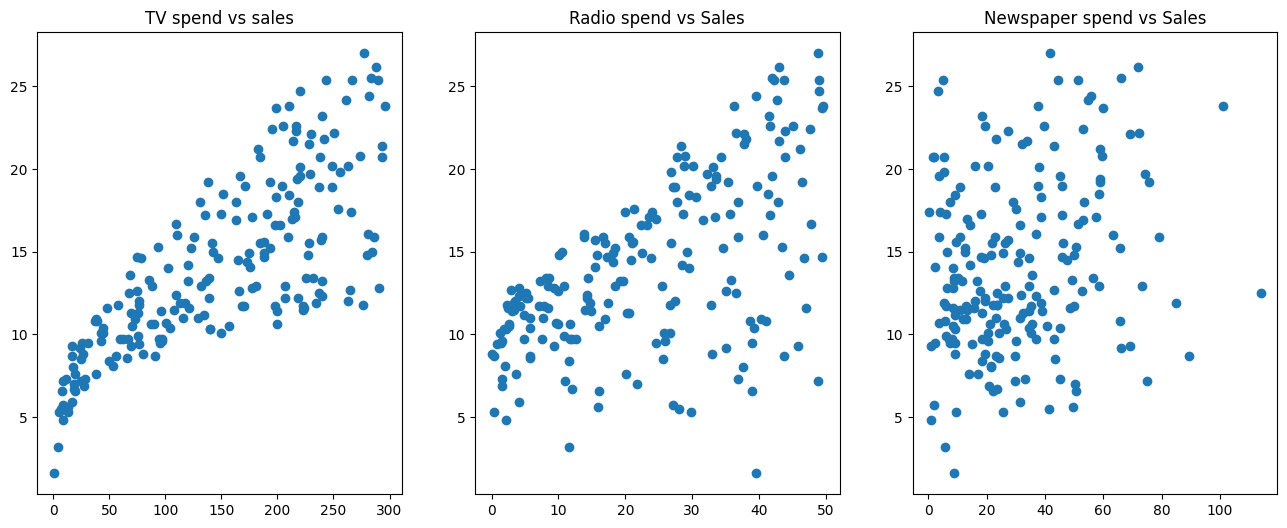

In [ ]:
fig,axes = plt.subplots(nrows= 1,ncols = 3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o') #positive corelation in this
axes[0].set_title('TV spend vs sales')

axes[1].plot(df['radio'],df['sales'],'o') #positive corelation in this
axes[1].set_title('Radio spend vs Sales')

axes[2].plot(df['newspaper'],df['sales'],'o') #no specific corelation in this
axes[2].set_title('Newspaper spend vs Sales')

In [ ]:
X = df.drop('sales',axis=1) #features
Y = df['sales'] #label

Train | Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size =0.3,random_state=101)

In [ ]:
X_train.shape

(140, 3)

In [ ]:
X_test.shape

(60, 3)

#Create a model

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()

In [ ]:
#Fit/Train the model on Training data
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_test

,sales
37,14.7
109,19.8
31,11.9
89,16.7
66,9.5
119,6.6
54,20.2
74,17.0
145,10.3
142,20.1


results seems very off when predicted by model and compared to real test label data

In [ ]:
campaign = [[123,34,23],[121,99,34]] #let's try the model now with new data
model.predict(campaign)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.01894448, 27.11777283])

We need to quantify it and make our model more accurate....

In [ ]:
Y_pred = model.predict(X_test)

#Understanding And Utilising Model

###Performance Analysis


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(Y_test,Y_pred)
MSE = mean_squared_error(Y_test,Y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
df['sales'].mean() # so mean of sales is almost 14

np.float64(14.0225)

In [ ]:
MAE

1.213745773614481

In [ ]:
1.2137/14  #this is how much error we will get so it's almost 9% error now if this is acceptable or not completely depends on context like what are we trying to do

0.08669285714285714

In [ ]:
MSE

2.2987166978863796

In [ ]:
MSE/14 #there is 16% error if we use mean squared error

0.1641940498490271

In [ ]:
RMSE

np.float64(1.5161519375993884)

In [ ]:
RMSE/14 #so there is like 10 percent error if we use RMSE

np.float64(0.10829656697138489)

###We can use any of these three methods for performance analysis and these methods will work differently depending on dataset , context ,how much error is acceptable, etc